# Neural Network

In [1]:
import pandas as pd
import numpy as np

import torch
import torch.nn as nn
import torch.optim as optim

import copy

In [2]:
from tqdm.auto import tqdm
import matplotlib.pyplot as plt

In [3]:
df_nn = pd.read_csv('../data/rice-yield-clean-data.csv')
df_nn.head()

,panicle,growth,yield
0,3.975,184.0,7.5000
1,3.975,184.0,6.7500
2,2.850,125.0,6.4275
3,4.500,147.5,7.2285
4,5.100,167.5,8.7150


## Model

In [4]:
np.random.seed(2)
torch.manual_seed(2)

model = nn.Sequential(
    # Layer 1
    nn.Linear(2, 8),
    nn.ReLU(),

    # Layer 2
    nn.Linear(8, 4),
    nn.ReLU(),

    # Output layer
    nn.Linear(4, 1),
    nn.ReLU(),
)

loss_function = nn.MSELoss()    # Mean Squared Error
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [5]:
print(model)

Sequential(
  (0): Linear(in_features=2, out_features=8, bias=True)
  (1): ReLU()
  (2): Linear(in_features=8, out_features=4, bias=True)
  (3): ReLU()
  (4): Linear(in_features=4, out_features=1, bias=True)
  (5): ReLU()
)


## Training and testing

In [6]:
# get the data
X = df_nn[['panicle', 'growth']].values
y = df_nn['yield'].values
y = y.reshape(y.shape[0],1)

X.shape, y.shape

# scale the input data
X = (X - X.mean(axis=0)) / X.std(axis=0)

# train-test split of the dataset based on time: first 80% entries are training data, last 20% are test data
X_train, X_test= np.split(X, [int(.8 *len(X))])
y_train, y_test= np.split(y, [int(.8 *len(y))])

# convert numpy arrays to torch tensors
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.FloatTensor(y_train)
y_test = torch.FloatTensor(y_test)

# parameters for training
n_epochs = 100

# save the best model for later analysis
best_mse = np.inf   # initialize to infinity
best_weights = None

# save losses for later visualization
test_losses = []
train_losses = []

# training loop
for epoch in range(n_epochs):
    model.train()
    epoch_train_losses = []

    with tqdm(total=len(X_train)) as bar:
        bar.set_description(f"Epoch {epoch+1}")
        for i in range(len(X_train)):
            # take a sample
            X_sample = X_train[i]
            y_sample = y_train[i]

            # forward pass
            y_pred = model(X_sample)
            loss = loss_function(y_pred, y_sample)

            # backward pass
            optimizer.zero_grad()
            loss.backward()

            # update weights
            optimizer.step()

            # save loss for later visualization
            epoch_train_losses.append(float(loss))
            
            # print progress
            bar.update()
            

    # evaluate accuracy at end of each epoch
    model.eval()
    y_pred = model(X_test)
    test_loss = float(loss_function(y_pred, y_test))

    # save loss and best model
    mean_train_loss = np.mean(epoch_train_losses)
    train_losses.append(mean_train_loss)
    test_losses.append(test_loss)
    if test_loss < best_mse:
        best_mse = test_loss
        best_weights = copy.deepcopy(model.state_dict())
    
    last_mse = test_loss
    last_weights = copy.deepcopy(model.state_dict())
    
    print(f"Train loss: {mean_train_loss:.6f}")
    print(f"Test loss: {test_loss:.6f}")

  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 41.343016
Test loss: 10.812593


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 1.656114
Test loss: 0.867150


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.918745
Test loss: 0.697611


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.836858
Test loss: 0.602564


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.786042
Test loss: 0.538522


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.751348
Test loss: 0.494033


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.727464
Test loss: 0.463141


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.711472
Test loss: 0.441670


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.699562
Test loss: 0.425590


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.692320
Test loss: 0.413790


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.686835
Test loss: 0.403702


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.681478
Test loss: 0.394733


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.675024
Test loss: 0.384349


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.665506
Test loss: 0.372039


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.652757
Test loss: 0.360857


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.639991
Test loss: 0.351797


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.628876
Test loss: 0.344684


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.620647
Test loss: 0.341155


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.614999
Test loss: 0.338416


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.611563
Test loss: 0.337096


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.609096
Test loss: 0.336191


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.607402
Test loss: 0.335625


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.606305
Test loss: 0.334450


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.605335
Test loss: 0.332883


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.604301
Test loss: 0.331323


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.603451
Test loss: 0.329252


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.602734
Test loss: 0.327672


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.602111
Test loss: 0.325741


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.601967
Test loss: 0.323927


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.601006
Test loss: 0.322986


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.600505
Test loss: 0.321565


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.600398
Test loss: 0.320852


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.600011
Test loss: 0.319143


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.599328
Test loss: 0.317996


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.599532
Test loss: 0.316524


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598931
Test loss: 0.314830


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598821
Test loss: 0.315110


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.599021
Test loss: 0.313924


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598529
Test loss: 0.312619


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598807
Test loss: 0.311911


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598187
Test loss: 0.311296


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597899
Test loss: 0.310758


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.598400
Test loss: 0.310369


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597971
Test loss: 0.310496


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597486
Test loss: 0.310322


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597964
Test loss: 0.309861


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597287
Test loss: 0.309694


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.597040
Test loss: 0.308655


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596743
Test loss: 0.308585


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596899
Test loss: 0.307982


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596380
Test loss: 0.307611


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596158
Test loss: 0.307598


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596048
Test loss: 0.306843


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595900
Test loss: 0.306958


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596226
Test loss: 0.306616


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595953
Test loss: 0.306679


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596008
Test loss: 0.306509


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596288
Test loss: 0.305997


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595949
Test loss: 0.305653


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595886
Test loss: 0.305502


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596192
Test loss: 0.305090


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595846
Test loss: 0.304835


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595913
Test loss: 0.304673


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595870
Test loss: 0.304714


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596172
Test loss: 0.304450


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595859
Test loss: 0.304313


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595879
Test loss: 0.304182


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595836
Test loss: 0.304601


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596178
Test loss: 0.304137


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595830
Test loss: 0.304339


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595857
Test loss: 0.304045


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595785
Test loss: 0.304432


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596057
Test loss: 0.303956


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595718
Test loss: 0.304078


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595738
Test loss: 0.303690


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595716
Test loss: 0.303768


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595689
Test loss: 0.303982


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595967
Test loss: 0.303481


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595641
Test loss: 0.303779


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595650
Test loss: 0.303739


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595558
Test loss: 0.303425


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595845
Test loss: 0.303426


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595541
Test loss: 0.303421


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595551
Test loss: 0.303034


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595478
Test loss: 0.303330


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595801
Test loss: 0.303203


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595480
Test loss: 0.303187


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595453
Test loss: 0.302778


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595479
Test loss: 0.302967


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595459
Test loss: 0.303136


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595679
Test loss: 0.302672


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595344
Test loss: 0.302840


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595420
Test loss: 0.302860


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595369
Test loss: 0.303037


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595647
Test loss: 0.302500


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595323
Test loss: 0.302617


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595319
Test loss: 0.302622


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595244
Test loss: 0.302730


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.596131
Test loss: 0.302351


  0%|          | 0/427 [00:00<?, ?it/s]

Train loss: 0.595505
Test loss: 0.302378


## Results

MSE in last epoch: 0.302378
MSE in best epoch: 0.302351


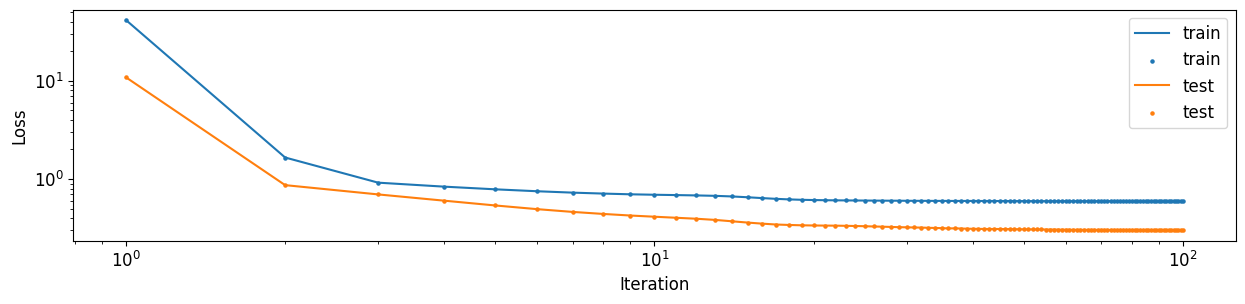

In [7]:
# Analysis of the results
print("MSE in last epoch: %.6f" % last_mse)
print("MSE in best epoch: %.6f" % best_mse)

# plot losses
fig = plt.figure(figsize=(15,3))
ax = fig.add_subplot(111)

plt.plot(range(1,len(train_losses)+1), train_losses, label='train')
plt.scatter(range(1,len(train_losses)+1), train_losses, marker='o', s=5, label='train')

plt.plot(range(1,len(test_losses)+1), test_losses, label='test')
plt.scatter(range(1,len(test_losses)+1), test_losses, marker='o', s=5, label='test')

ax.set_xscale('log')
ax.set_yscale('log')

plt.xlabel('Iteration', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.legend(fontsize=12)

plt.show()

In [8]:
best_weights

OrderedDict([('0.weight',
              tensor([[ 0.1168, -0.1180],
                      [ 0.1497, -0.0343],
                      [ 0.6639,  0.1744],
                      [-0.1445, -0.5547],
                      [ 0.0021, -1.1560],
                      [ 0.1609,  0.0969],
                      [-0.2501,  0.6321],
                      [ 0.0307,  0.3202]])),
             ('0.bias',
              tensor([ 1.1781, -0.4606, -0.4792,  1.4672,  0.0298,  0.6711,  0.6602,  1.3413])),
             ('2.weight',
              tensor([[-0.0336,  0.0931, -0.0170, -0.1980, -0.2004, -0.1718, -0.3212, -0.2294],
                      [ 0.0610,  0.2222,  0.0028, -0.1829,  0.1443, -0.1522, -0.0875, -0.2119],
                      [ 0.6226, -0.2907,  0.4525,  0.7810, -0.5792,  0.5858,  0.4467,  0.6720],
                      [ 0.7013,  0.0545,  0.4847,  0.8116, -0.4004,  0.5870,  0.1678,  0.5712]])),
             ('2.bias', tensor([-0.0718,  0.1838,  0.8107,  1.0152])),
             ('4.weight', tens

In [9]:
model.load_state_dict(best_weights)

y_pred = model(X_test)

# RMSE of the predicted crisp yield
RMSE_predicted_vs_real = np.sqrt(np.mean((y_test.detach().numpy() - y_pred.detach().numpy())**2))
RMSE_predicted_vs_real

0.5498644

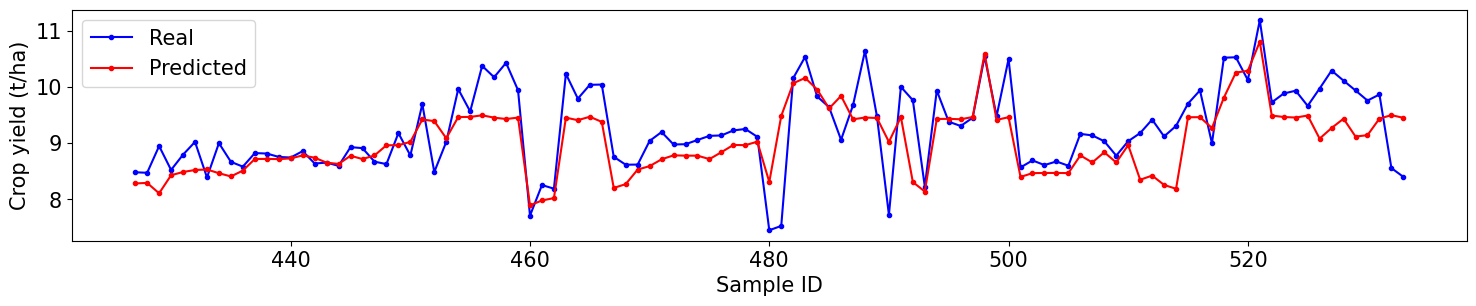

In [10]:
# plot real vs predicted yield

x_ticks = list(range(int(.8 *len(y)), len(y)))
plt.figure(figsize=(18,3))
plt.plot(x_ticks, y_test.detach().numpy()[:250], linestyle='-', marker='.', color='blue', label='Real')
plt.plot(x_ticks, y_pred.detach().numpy()[:250], linestyle='-', marker='.', color='red', label='Predicted')
plt.legend(fontsize=15)
plt.xlabel('Sample ID', fontsize=15)
plt.ylabel('Crop yield (t/ha)', fontsize=15, rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()